

# Investigate a Dataset : no show appointments-kagglev2-may-2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> ●This dataset collects information from 100k medical appointments in Brazil
> 
> ●and is focused on the question of whether or not patients show up for their appointment.
> 
> ●A number of characteristics about the patient are included in each row.
> 
> ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
> 
> ● ‘Neighborhood’ indicates the location of the hospital.
> 
> ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
> 
> ● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. We will address that in the next steps so as not to get confused


In [75]:
# we will Use this cell to set up import statements for all of the packages that we plan to use.
# We will include a 'magic word' so that the visualizations are plotted inline with the notebook.

import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Questions

attendance ratio

which features affect in attendance

<a id='wrangling'></a>
## Data Wrangling

> In this part, we are going to view, clean and trim the data

### General Properties and Cleaning

In [76]:
# Load data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.

df = pd.read_csv('C:\\Users\gdabu\\noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# Data information
df.info()

There is no Missing Data

In [ ]:
# Finding duplicate data
df.duplicated().sum()

There is no duplicate Data

In [ ]:
# Data summarize
df.describe()

There is wrong age

In [ ]:
# Finding wrong age
wrong_age = df.query('Age == -1')
wrong_age

In [77]:
# Deleting wrong age
df.drop(index = 99832 , inplace = True)

In [ ]:
# Finding unique values for patients
df['PatientId'].nunique()

In [ ]:
# Duplicate attendance status for patients
print(df.duplicated(['PatientId', 'No-show']).sum())

In [78]:
# Deleting Duplicate attendance status for patients
df.drop_duplicates(['PatientId', 'No-show'] , inplace = True)

In [ ]:
# New Data dimensions
df.shape

In [79]:
# Deleting unimportant columns
df.drop(['PatientId', 'ScheduledDay','AppointmentDay','AppointmentID'] , axis = 1, inplace = True)

In [80]:
# Fixing columns name
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show':'attended'}, inplace = True)
# # Edit column "attended" values to be clear
df['attended'] = df['attended'].apply(lambda x : x.replace('No','1'))
df['attended'] = df['attended'].apply(lambda x : x.replace('Yes','0'))
df['attended'] = df['attended'].apply(lambda x : x.replace('1','Yes'))
df['attended'] = df['attended'].apply(lambda x : x.replace('0','No'))

In [90]:
# New Data
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,attended
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


<!-- Changing the Name of 'No-show' Column to 'attended' -->
<!-- Replacing 'No' Value to 1 and 'Yes' to 0 -->
<!-- Converting Column dtype to numeric -->

In [ ]:
# New Data describtion
df.describe()

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimed and cleaned the data, we move on to exploration. Calculate statistics and create visualizations address the questions we asked in the Introduction section.
> 
> 


In [ ]:
df.hist(figsize=(14,8) , bins = 20);

### Research Question 1  (attendance rate)

In [81]:
attended = df.attended == 'Yes'
not_attended = df.attended == 'No'
pd.DataFrame([df[attended].count() , df[not_attended].count()] , index=['attended' , 'not_attended'])

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,attended
attended,54153,54153,54153,54153,54153,54153,54153,54153,54153,54153
not_attended,17663,17663,17663,17663,17663,17663,17663,17663,17663,17663


In [82]:
pd.DataFrame([df[attended].mean() , df[not_attended].mean()] , index=['attended' , 'not_attended'])

C:\Users\gdabu\AppData\Local\Temp/ipykernel_6316/3294950835.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame([df[attended].mean() , df[not_attended].mean()] , index=['attended' , 'not_attended'])


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
attended,37.229166,0.091334,0.202944,0.072868,0.02360,0.020904,0.297232
not_attended,34.376267,0.108419,0.170922,0.065108,0.02944,0.017777,0.453094


### Research Question 2  (Gender  affection in attendance  rate)

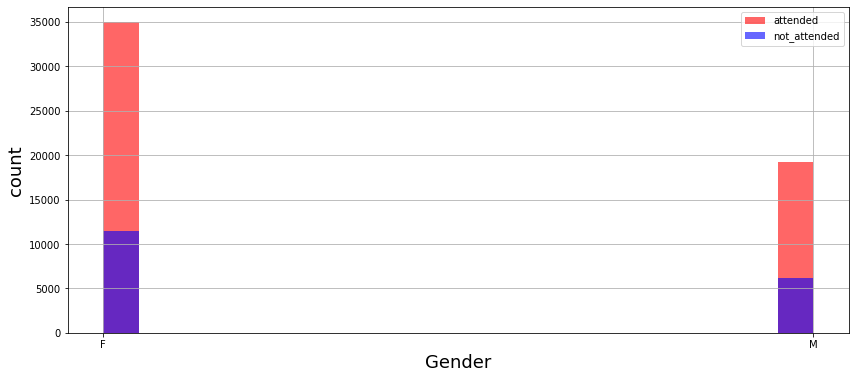

In [84]:
df['Gender'][attended].hist(alpha=0.6, bins=20, color='red', label= 'attended' , figsize = (14,8))
df['Gender'][not_attended].hist(alpha=0.6, bins=20, color='blue', label= 'not_attended' , figsize = (14,6))
plt.xlabel('Gender', fontsize = 18)
plt.ylabel('count' , fontsize = 18)
plt.legend();

There is no affection

### Research Question 3  (age affection in attendance  rate)

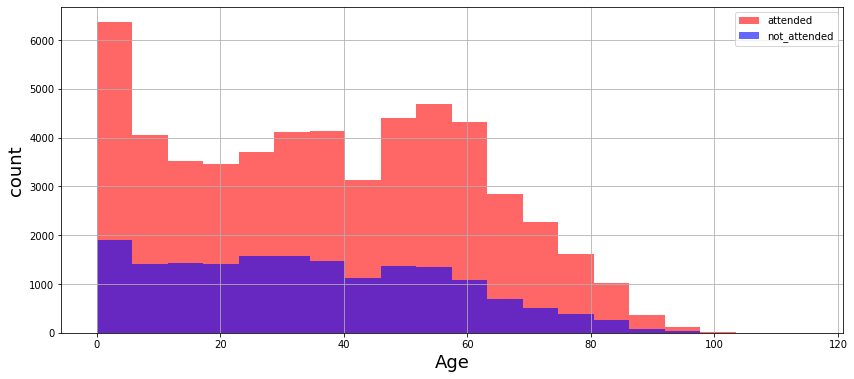

In [83]:
df['Age'][attended].hist(alpha=0.6, bins=20, color='red', label= 'attended' , figsize = (14,8))
df['Age'][not_attended].hist(alpha=0.6, bins=20, color='blue', label= 'not_attended' , figsize = (14,6))
plt.xlabel('Age', fontsize = 18)
plt.ylabel('count' , fontsize = 18)
plt.legend();

There is affection

### Research Question 4  (Gender & Age  affection in attendance  rate)

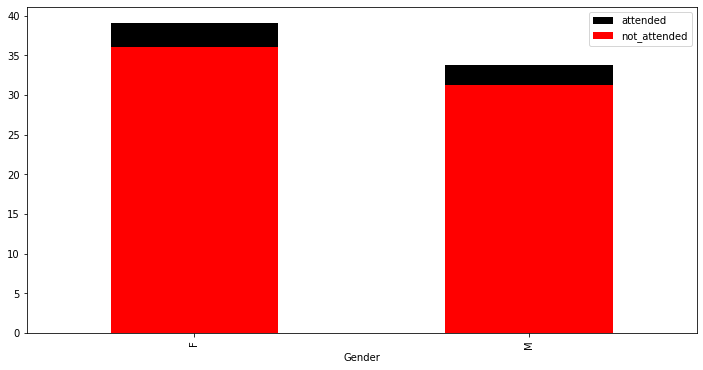

In [85]:
df[attended].groupby(['Gender']).Age.mean().plot(kind='bar', color='black', label= 'attended', figsize = (12,6))
df[not_attended].groupby(['Gender']).Age.mean().plot(kind='bar', color='red', label= 'not_attended', figsize = (12,6))
plt.legend();

There is no affection

### Research Question 5  (Neighbourhood  affection in attendance  rate)

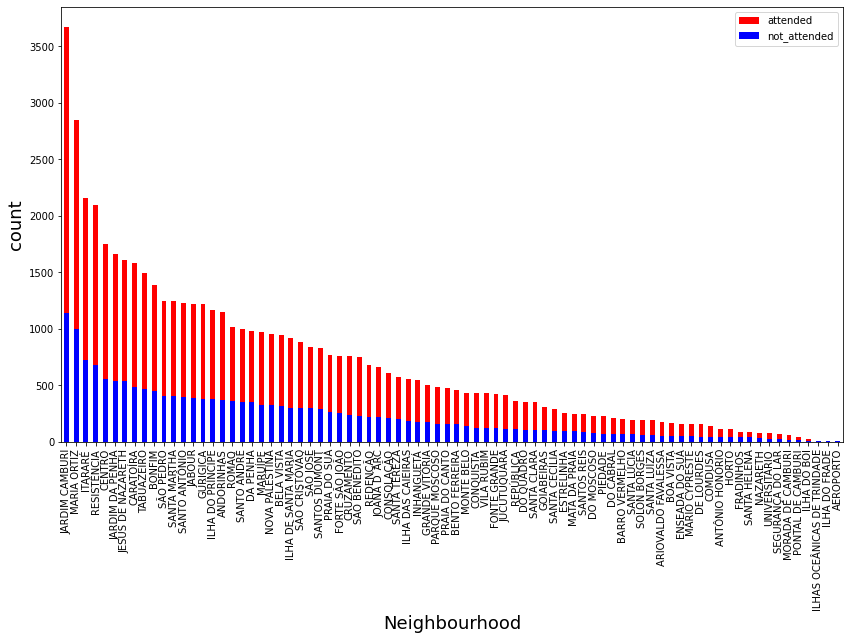

In [88]:
df['Neighbourhood'][attended].value_counts().plot(kind = 'bar' ,color='red', label= 'attended' , figsize = (14,8))
df['Neighbourhood'][not_attended].value_counts().plot(kind = 'bar' ,color='blue', label= 'not_attended' , figsize = (14,8))
plt.xlabel('Neighbourhood', fontsize = 18)
plt.ylabel('count' , fontsize = 18)
plt.legend();

there is affection

### Research Question 6  (Scholarship   affection in attendance  rate)

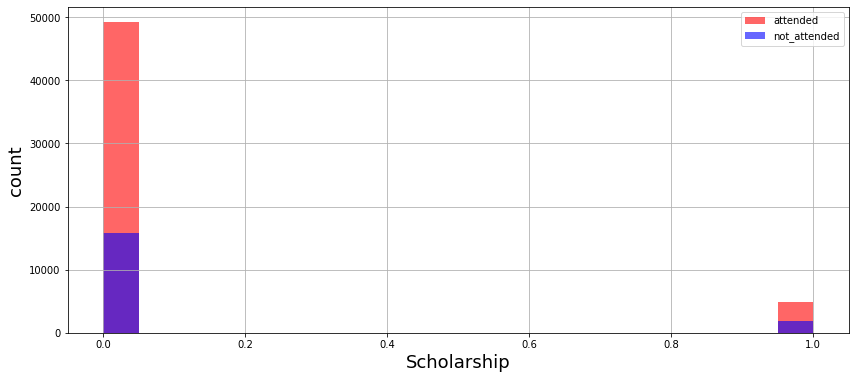

In [89]:
df['Scholarship'][attended].hist(alpha=0.6, bins=20, color='red', label= 'attended' , figsize = (14,8))
df['Scholarship'][not_attended].hist(alpha=0.6, bins=20, color='blue', label= 'not_attended' , figsize = (14,6))
plt.xlabel('Scholarship', fontsize = 18)
plt.ylabel('count' , fontsize = 18)
plt.legend();

There is no affection

### Research Question 7  (Hypertension &  Diabetes & Alcoholism & Age  affection in attendance  rate)

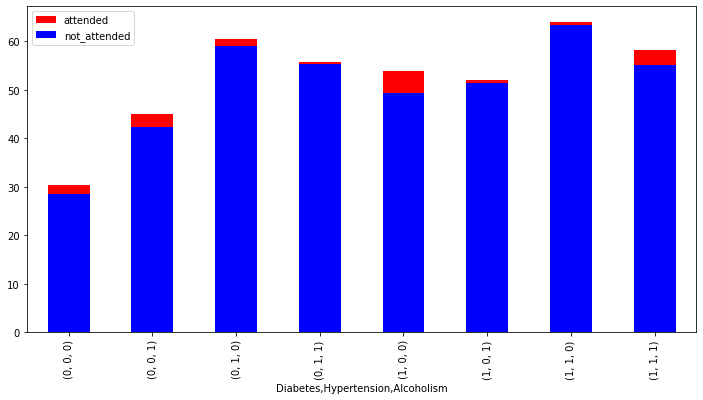

In [86]:
df[attended].groupby(['Diabetes','Hypertension','Alcoholism']).mean()['Age'].plot(kind='bar', color='red', label= 'attended', figsize = (12,6))
df[not_attended].groupby(['Diabetes','Hypertension','Alcoholism']).mean()['Age'].plot(kind='bar', color='blue', label= 'not_attended', figsize = (12,6))
plt.legend();

There is no affection

### Research Question 8  (SMS_received  affection in attendance  rate)

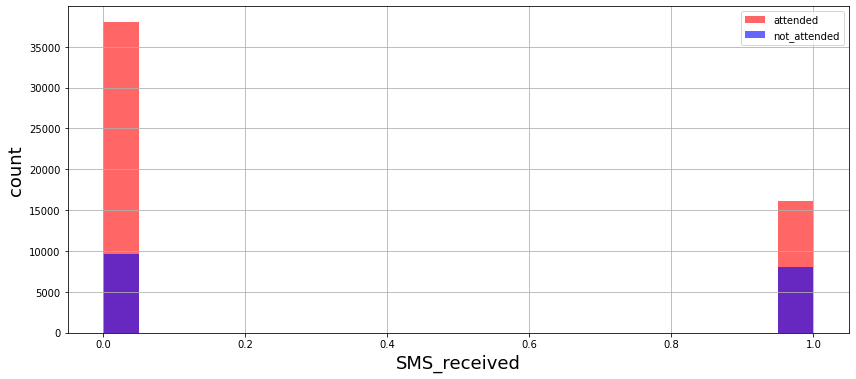

In [87]:
df['SMS_received'][attended].hist(alpha=0.6, bins=20, color='red', label= 'attended' , figsize = (14,8))
df['SMS_received'][not_attended].hist(alpha=0.6, bins=20, color='blue', label= 'not_attended' , figsize = (14,6))
plt.xlabel('SMS_received', fontsize = 18)
plt.ylabel('count' , fontsize = 18)
plt.legend();

There is no affection

<a id='conclusions'></a>
## Conclusions

• younger ages, attendance was higher than at older ages

• location affects  of attendance .

• Gender, Scholarship, Hypertension, Diabetes, Alcoholism, SMS_received does not affect in attendance.
